<a href="https://colab.research.google.com/github/nurfnick/Cantrell_Jackson/blob/master/Oil_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pa
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from google.colab import files
import plotly.graph_objects as go
import math
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import plotly.express as px
from scipy import stats

In [0]:
ourl = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/wti-crude-oil-prices-2018-2020.csv'
mturl = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Invoice_totals_month.csv'

In [18]:
dfo = pa.read_csv(ourl)

months = ['10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9']
jdates = []
dates = dfo['date'].values.tolist()
for d in range(len(dates)):
  if isinstance(dates[d], str):
    jdates.append(dates[d])

jprices = []
prices = dfo[' value'].values.tolist()
for p in range(len(prices)):
  if math.isnan(prices[p]) == False:
    jprices.append(prices[p])

opm = []
for m in range(len(months)):
  total = 0
  num = 0
  for d in range(len(jdates)):
    if months[m] in months[0:3]:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2018':
        total = total + jprices[d]
        num = num + 1
    else:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2019':
        total = total + jprices[d]
        num = num + 1
  opm.append(float(round(total/num, 2)))

print(opm)

[70.77, 56.72, 49.04, 51.58, 55.01, 58.2, 63.87, 60.88, 54.74, 57.55, 54.83, 56.97]


In [4]:
months = ['Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19']

fig = px.scatter(x=months, y=opm, labels={'x':'Month', 'y':'Oil Price Average'})
fig.show()

In [0]:
dfmt = pa.read_csv(mturl)

montht = dfmt['Total'].values.tolist()
monthts = []
for t in range(len(montht)):
  monthts.append(float(montht[t]))

In [34]:
fig = px.scatter(x=months, y=monthts, labels={'x':'Month', 'y':'Total Invoice per Month'})
fig.show()

In [35]:
fig = px.scatter(x=monthts, y=opm, labels={'x':'Invoice Total per Month', 'y':'Oil Price per Month'})
fig.show()

In [22]:
print(monthts)
print(opm)

[26.6, 32.35, 27.35, 31.85, 38.85, 38.65, 34.7, 41.325, 42.2, 37.2, 45.2, 40.0]
[70.77, 56.72, 49.04, 51.58, 55.01, 58.2, 63.87, 60.88, 54.74, 57.55, 54.83, 56.97]


In [0]:
m = stats.linregress(monthts,opm)[0]
b = stats.linregress(monthts,opm)[1]
#stats.linregress()
def y(x):
    return(m*x+b)

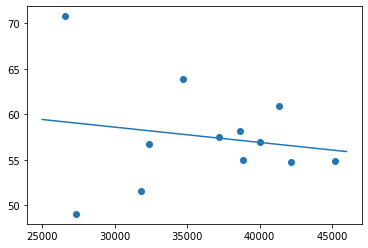

In [40]:
x = np.arange(25000,46000,0.01)
plt.scatter(monthts,opm)
plt.plot(x,y(x))

In [0]:
url = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Support-Oct18-Sept19.csv'
url2 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/HS_Invoiced_Customer_Total.csv'

In [0]:
df1 = pa.read_csv(url)
df2 = pa.read_csv(url2)

In [0]:
custs = sorted(list(set(df1['HS Customer'].values.tolist())))
calist = []
for c in range(len(custs)):
  calist.append(len(df1[df1['HS Customer']== custs[c]]))


In [0]:
tolcusts = sorted(list(set(df2['hs_customer_id'].values.tolist())))
totals = df2['Total '].values.tolist()
tlist = []
tc = 0

for c in range(len(custs)):
  if custs[c] in tolcusts:
    tlist.append(totals[tc])
  else:
    tc = tc - 1
    tlist.append('NA')
  tc = tc + 1

ntlist = []
for t in range(len(tlist)):
  if tlist[t] == 'NA':
    nt = 0
    ntlist.append(nt)
  else:
    nt = int(tlist[t])
    ntlist.append(nt)

In [0]:
fig = go.Figure(data=[go.Table(header=dict(values=['Customer', 'Calls', 'Total']),
                 cells=dict(values=[custs, calist, tlist]))])

fig.show()

In [0]:
fig = px.scatter(x=ntlist, y=calist, log_x=True, log_y=True, hover_data=[custs])

# Change the bar mode
#fig.update_layout(barmode='group')
fig.show()

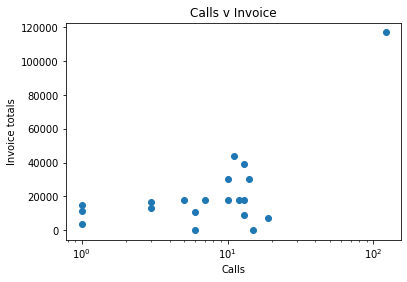

In [0]:
# Create data
x = calist
y = ntlist

# Plot
plt.scatter(x, y)
plt.title('Calls v Invoice')
plt.xlabel('Calls')
plt.ylabel('Invoice totals')
plt.xscale('log')
plt.show()

In [0]:
averages = []
for c in range(len(custs)):
  if tlist[c] == 'NA':
    a = 0
  else:
    a = int(tlist[c]) / int(calist[c])
    a = round(a, 2)
  averages.append(a)

fig = go.Figure(data=[
    go.Bar(name='Calls', x=custs, y=averages),
])

fig.show()

In [0]:
cn = [4, 5, 10, 15, 16, 18, 19, 21, 23, 25, 28, 34, 37, 39, 41, 45]
lcn = [5, 16, 18, 19]
ncn= [21, 25]
lcnurls = ['https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_5.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_16.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_18.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_19.zip']
names = ['hs_customer_5.csv', 'hs_customer_16.csv', 'hs_customer_18.csv', 'hs_customer_19.csv']
rtlist = []
u = 0
for n in range(len(cn)):
  if cn[n] in ncn:
    rtlist.append('NA')
    continue
  elif cn[n] in lcn:
    url3 = urlopen(lcnurls[u])
    zipfile = ZipFile(BytesIO(url3.read()))
    df3 = pa.read_csv(zipfile.open(names[u]), dtype=object)
    u = u + 1
  else:
    url3 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/hs_customer_'+str(cn[n])+'.csv'
    df3 = pa.read_csv(url3)

  invoiceid = set(df3['invoice_id'].values.tolist())
  visited = []
  invoices = df3['invoice_total'].values.tolist()
  r = 0

  total = 0
  did = []
  didnt = []

  for row in df3['invoice_id']:
    if str(row) not in visited:
      did.append(1)
      visited.append(str(row))
      if isinstance(invoices[r], str) == True:
        i = float(invoices[r])
      else:
        i = invoices[r]
      if math.isnan(i) == True:
        total = total + 0
      else:
        total = total + i
      r = r + 1
    else:
      didnt.append(1) 
      r = r + 1

  rtlist.append(round(total, 2))
  print('Customer '+str(cn[n])+' invoice total: '+str(round(total, 2)))

print(rtlist)

Customer 4 invoice total: 6393062.57
Customer 5 invoice total: 15634750.34
Customer 10 invoice total: 2646213.89
Customer 15 invoice total: 3674778.17
Customer 16 invoice total: 23066653.63
Customer 18 invoice total: 31766792.04
Customer 19 invoice total: 17028032.06
Customer 23 invoice total: 6562454.33
Customer 28 invoice total: 6300425.98
Customer 34 invoice total: 3788197.82
Customer 37 invoice total: 2265649.31
Customer 39 invoice total: 729041.88
Customer 41 invoice total: 4583307.18
Customer 45 invoice total: 2142129.89
[6393062.57, 15634750.34, 2646213.89, 3674778.17, 23066653.63, 31766792.04, 17028032.06, 'NA', 6562454.33, 'NA', 6300425.98, 3788197.82, 2265649.31, 729041.88, 4583307.18, 2142129.89]


In [0]:
rntlist = []
for t in range(len(rtlist)):
  if rtlist[t] == 'NA':
    nt = 0
    rntlist.append(nt)
  else:
    nt = int(rtlist[t]) / 100000
    nt = round(nt, 2)
    rntlist.append(nt)

fig = go.Figure(data=[
    go.Bar(name='Customer Invoice from CJ (in k)', x=custs, y=ntlist),
    go.Bar(name='Cumtomer Invoice totals (in 1,000k)', x=custs, y=rntlist)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [0]:
# Create data
x = calist
y = ntlist

# Plot
plt.scatter(x, y)
plt.title('Customer Invoiced from CJ v Customer')
plt.xlabel('Calls')
plt.ylabel('Invoice totals')
plt.xscale('log')
plt.show()